In [3]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

Suponga que **X** e **Y** son variables aleatorias independientes con media 0 y varianza 1. Cual es la media
$μ_Z$ y la matriz de covarianza de Z = (X, Y, aX + bY), $a, b \in R$ 

Como Z es una variable aleatoria vectorial entonces $μ_Z$ es el vector de valores esperados que se define como 
$$
    μ_Z = (\space E[X],\space E[Y],\space E[aX + bY] \space)
$$
$$
    μ_Z = (\space E[X],\space E[Y],\space E[aX] + E[bY] \space)
$$
$$
    μ_Z = (\space E[X],\space E[Y],\space aE[X] + bE[Y] \space)
$$
$$
    μ_Z = (\space μ_X,\space μ_Y,\space aμ_X + bμ_Y \space)
$$
$$
    μ_Z = (\space 0,\space 0,\space 0 \space)
$$

Luego la matriz de covarianza de Z esta definida por

$$
\begin{pmatrix}
Cov(X,X) & Cov(Y,X) & Cov(aX + bY,X) \\
Cov(X,Y) & Cov(Y,Y) & Cov(aX + bY,Y) \\
Cov(X,aX + bY) & Cov(Y,aX + bY) & Cov(aX + bY, aX + bY) \\
\end{pmatrix}
$$

Dado que X y Y son independientes entonces Cov(X, Y) = Cov(Y, X) = 0. Además por datos Cov(X, X) = Cov(Y, Y) = 1. Y finalmente:


$$

Cov(aX + bY, X) = a * Cov(X, X) + \cancel{b * Cov(Y, X)} = a \\
Cov(X,aX + bY) = a * Cov(X, X) + \cancel{b * Cov(X, Y)} = a \\
Cov(aX + bY, Y) = \cancel{a * Cov(X, Y)} + b * Cov(Y, Y) = b \\
Cov(Y,aX + bY) = \cancel{a * Cov(Y, X)} + b * Cov(Y, Y) = b \\
Cov(aX + bY, aX + bY) = (a * Cov(X, X))^2 + \cancel{2ab * Cov(X, Y)} + (b * Cov(Y, Y))^2 = a^2 + b^2 

$$

Por tanto:

$$
\begin{pmatrix}
1 & 0 & a \\
0 & 1 & b \\
a & b & a^2 + b^2 \\
\end{pmatrix}
$$

---


---

En clases observamos que el número esperado de comparaciones realizadas por el algoritmo Quicksort
Aleatorio es de 2nln(n) + O(n), donde n es el largo de la lista S. El objetivo es testear este resultado.
Para esto:
- Programe el algoritmo Quicksort con pivot aleatorio presentado en clases para ordenar de forma
ascendente una lista S de números reales distintos. Corrobore que su algoritmo funciona mostrando
la lista ordenada S = [0, 5, 4, 1, 7, 6, 3, 2, 8, 9].
- Para largo de lista n fijo, obtenga lista aleatorias y aplique el algoritmo a cada una de ellas calculando
el numero de comparaciones realizadas en el algoritmo. Calcule el promedio de estas para n fijo.
- Repite el procedimiento anterior para n = [100, 200, 300, ..., 5000] y grafique n vs. el promedio de
comparaciones para cada n. Ademas grafique las curvas correspondientes a y = 2nln(n) y y = 2n.
- Explique porque los resultados del experimento corroboran los resultados teórico

In [24]:
def quicksort(S):
    if len(S) == 1 or not S:
        return S, 0
    
    S = S.copy()    
    # choose pivot
    ix = np.random.choice(range(0, len(S)))
    x = S.pop(ix)
    S1, S2 = [], []
    
    for item in S:
        if item < x:
            S1.append(item)
        else:
            S2.append(item)
    
    S1, count1 = quicksort(S1)
    S2, count2 = quicksort(S2)
    return S1 + [x] + S2, len(S) + count1 + count2

print(quicksort([0, 5, 4, 1, 7, 6, 3, 2, 8, 9]))
%%capture

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 36)


UsageError: Line magic function `%%capture` not found.


In [19]:
collection = defaultdict(list)
for n in range(100, 5001, 100):
    for _ in range(1000):
        S = np.random.randint(0, 5000 + 1, n).tolist()   
        _, count = quicksort(S)
        collection[n].append(count) 
    print(f'Para dimension {n} el promedio de comparaciones fue {np.mean(collection[n])}')

Para dimension 100 el promedio de comparaciones fue 648.053
Para dimension 200 el promedio de comparaciones fue 1563.714
Para dimension 300 el promedio de comparaciones fue 2582.053
Para dimension 400 el promedio de comparaciones fue 3659.699
Para dimension 500 el promedio de comparaciones fue 4814.067
Para dimension 600 el promedio de comparaciones fue 5983.853
Para dimension 700 el promedio de comparaciones fue 7227.726
Para dimension 800 el promedio de comparaciones fue 8464.058
Para dimension 900 el promedio de comparaciones fue 9719.631
Para dimension 1000 el promedio de comparaciones fue 10973.552
Para dimension 1100 el promedio de comparaciones fue 12244.023
Para dimension 1200 el promedio de comparaciones fue 13610.546
Para dimension 1300 el promedio de comparaciones fue 15033.629
Para dimension 1400 el promedio de comparaciones fue 16336.309
Para dimension 1500 el promedio de comparaciones fue 17667.106
Para dimension 1600 el promedio de comparaciones fue 19110.388
Para dimens

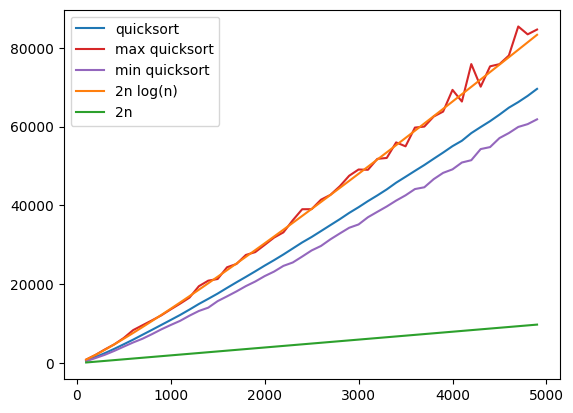

In [20]:
n = np.asarray(range(100, 5000, 100))
cc = [np.mean(collection[ni]) for ni in n]
cmax = [np.max(collection[ni]) for ni in n]
cmin = [np.min(collection[ni]) for ni in n]
plt.plot(n, cc, 'C00',label='quicksort')
plt.plot(n, cmax, 'C03',label='max quicksort')
plt.plot(n, cmin, 'C04',label='min quicksort')
plt.plot(n, 2*n * np.log(n), 'C01', label='2n log(n)')
plt.plot(n, 2*n, 'C02', label='2n')
plt.legend()
plt.show()

Como se puede ver en la gráfica la función 2nln(n) es una buena cota superior para el número promedio de comparaciones que realiza quicksort. Incluso, es una buena aproximación al costo del algoritmo el caso peor de dicho algoritmo.
___

---

Sea $f:R^d → R$ una función es diferenciable. Pruebe que $f$ es una función convexa si y sólo si se satisface
$$
f(y) ≥ f (x) + ∇f (x)⊤(y − x)
$$

para todo x, y en el dominio de $f$ 

(=>) Si x, y $ \in R^d$ y $f$ es convexa entonces:

$$
f (\lambda y + (1 - \lambda) x) \le \lambda f(y) + (1- \lambda) f(x)
$$

$$
f (\lambda y + x - \lambda x) \le \lambda f(y) + f(x) - \lambda f(x)
$$

$$
f ( x  + \lambda(y - x)) \le \lambda (f(y) - f(x)) + f(x) 
$$

$$
\frac{f ( x  + \lambda(y - x)) - f(x)}{\lambda} \le f(y) - f(x)
$$

$$
f(y) \ge f(x) + \frac{f ( x  + \lambda(y - x)) - f(x)}{\lambda} 
$$

Como la derivada direccional de $f$ en la dirección $d$ se define como:

$$
f'(x, d) =  \nabla f(x) ⊤ d = \lim_{\lambda \to 0} \frac{f (x  + \lambda d) - f(x)}{\lambda}
$$

Entonces tomando el limite $\lambda \rightarrow 0$ se tiene que:

$$
f(y) \ge f(x) + \nabla f(x) ⊤ (y-x) \square
$$

(<=) Sea x $ne$ y, $\lambda \in$ [0, 1] tal que z = $\lambda x + (1- \lambda) y$ entonces:

$$
f(x) ≥ f (z) + ∇f (z)⊤(x − z) \\ 
f(y) ≥ f (z) + ∇f (z)⊤(y − z) 
$$

$$
\lambda f(x) + (1 - \lambda) f(y) ≥ \lambda (f (z) + ∇f (z)⊤(x − z)) + (1 - \lambda)(f (z) + ∇f (z)⊤(y − z)) 
$$
$$
\lambda f(x) + (1 - \lambda) f(y) ≥ \cancel{\lambda f (z)} + \lambda ∇f (z)⊤(x − z) + f (z) + ∇f (z)⊤(y − z) - \cancel{\lambda f (z)} - \lambda ∇f (z)⊤(y − z) 
$$
$$
\lambda f(x) + (1 - \lambda) f(y) ≥  f (z) +   ∇f (z)⊤ (\lambda(x − z) + (y − z)  - \lambda (y − z) )
$$

$$
\lambda f(x) + (1 - \lambda) f(y) ≥  f (z) +   ∇f (z)⊤ (\lambda x − \cancel{\lambda z} + y − z  - \lambda y + \cancel{\lambda z} )
$$

$$
\lambda f(x) + (1 - \lambda) f(y) ≥  f (z) +   ∇f (z)⊤ (\lambda x + (1 - \lambda) y − z )
$$

Como z = $\lambda x + (1- \lambda) y$ entonces: 

$$
\lambda f(x) + (1 - \lambda) f(y) ≥  f (\lambda x + (1- \lambda) y) +   \cancel{∇f (z)⊤ (z − z )}
$$

$$
f (\lambda x + (1- \lambda) y) \le  \lambda f(x) + (1 - \lambda) f(y)
$$

Se cumple la desigualdad y por tanto $f$ es convexa $\square$

---

---

Considere el set de datos datos_lineales.csv que contiene pares de puntos (x, y) $\in R^2$. Se busca resolver el problema:

$$
\min_{\sigma \in R^2} \lVert X \sigma - y \rVert_2^2, \space X \in R ^ {N x 2}, \space y \in R ^ N 
$$

donde θ son los coeficientes del polinomio lineal que mejor ajusta la matriz de datos X con los valores y.

-  Programe el algoritmo de descenso de gradiente para resolver este problema. Considere como parámetros de este algoritmo: X, y, NITMAX, gamma donde NITMAX es el máximo número de iteraciones y gamma es la función tasa de aprendizaje.
- Programe el algoritmo de descenso de gradiente estocástico para resolver este problema. Considere como parámetros de este algoritmo: X, y, NITMAX, gamma donde NITMAX es el máximo número de iteraciones y gamma es la función tasa de aprendizaje.
-  Considere las siguientes tasas de aprendizaje:
    $$
    γ(t) = γclases(t), γ(t) = log(t)
    $$ 
    Donde γclases es la heurística vista en clases. Para cada una ejecute 100 veces el algoritmo estocástico y reporte el promedio de los resultados. Compare estos sus resultados con los del algoritmo determinista con la tasa correspondiente.
- Repita el item anterior pero ahora con el set de datos datos_cuadraticos.csv. Notar que ahoraX ∈ RN ×3 y que θ ∈ R3


[ 0.53673102 -0.1426763 ] 2.5688621757264625


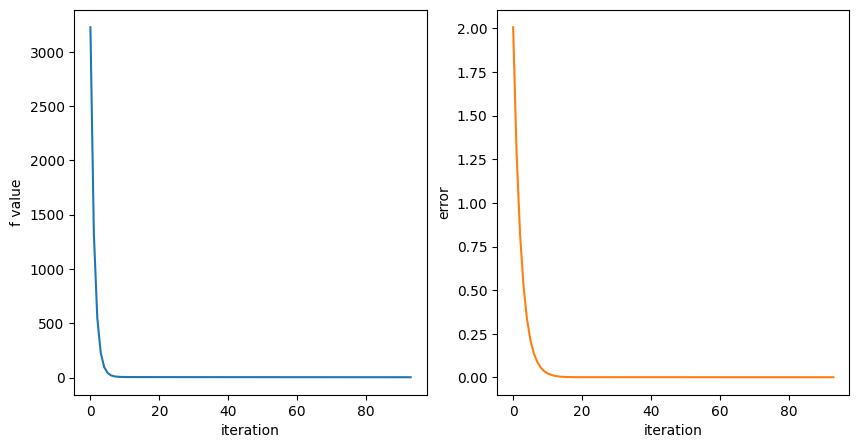

In [40]:
from functools import partial
from typing import Any

def f(A, b, x):
    norm = np.linalg.norm(A.dot(x) - b)
    return norm * norm

def gradient(A, b, x):
    return 2 * A.T.dot(A.dot(x) - b)
    
def grad_descent(x0, f, grad, gamma, max_iter=100):
    xi = x0
    t = []
    for i in range(max_iter):
        Vf = grad(xi)

        if any(x in [np.inf, np.nan] for x in Vf):
            break
        
        xnew = xi - gamma(i) * Vf
        if f(xnew) > f(xi):
            gamma.reduce()
        else:
            t.append((f(xnew), np.linalg.norm(xnew-xi)))
            xi = xnew

    return xi, t


df = pd.read_csv('./datos_lineales.csv')

class LearningRateFixed:
    def __init__(self, gama = 0.01) -> None:
        self.gama = gama
    
    def __call__(self, *args: Any, **kwds: Any) -> Any:
        return self.gama

    def reduce(self):
        self.gama /= 2




A = df[['x', 'y']].to_numpy()
x0 = np.array([1, 1])
b = np.zeros(len(df))

v, hist = grad_descent(x0, partial(f, A, b), partial(gradient, A, b), LearningRateFixed())


def print_result(v, hist):
    print(v, f(A, b, v))

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

    ax[0].plot(list(range(len(hist))), list(map(lambda x:x[0], hist)), 'C00', label = 'f')
    ax[0].set_xlabel('iteration')
    ax[0].set_ylabel('f value')
    ax[1].plot(list(range(len(hist))), list(map(lambda x:x[1], hist)), 'C01', label = 'e')
    ax[1].set_xlabel('iteration')
    ax[1].set_ylabel('error')

    plt.show()

print_result(v, hist)

[ 0.67121008 -0.1781516 ] 4.016947603017576


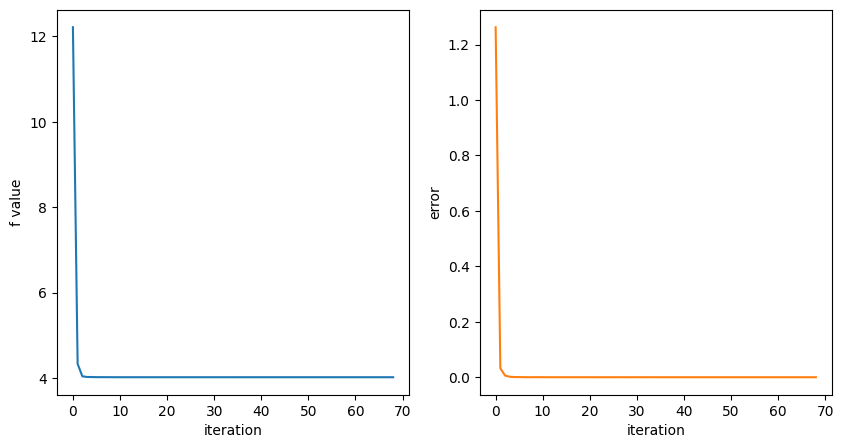

In [41]:
def gradient_stochastic(A, b, x, batch_size = 10):
    idx = np.random.randint(A.shape[0], size=batch_size)
    A_batch = A[idx,:]
    b_batch = b[idx] 

    return gradient(A_batch, b_batch, x)

v, hist = grad_descent(x0, partial(f, A, b), partial(gradient_stochastic, A, b), LearningRateFixed())
print_result(v, hist)

[ 0.73558663 -0.19567079] 4.825498516048883


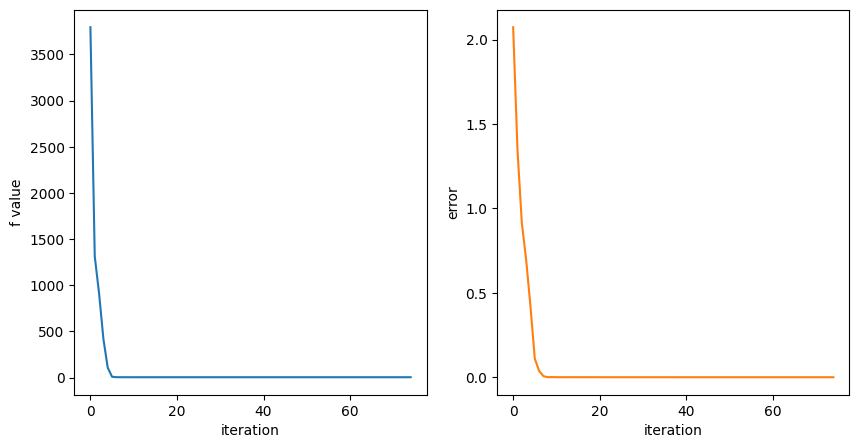

In [42]:
class LearningRateDescend:
    def __init__(self, a = 1, k0= 1) -> None:
        self.a, self.k0 = a, k0
    
    def __call__(self, index) -> Any:
        return 1/(self.a * (self.k0 + index))

    def reduce(self):
        self.a *= 2

v, hist = grad_descent(x0, partial(f, A, b), partial(gradient_stochastic, A, b), LearningRateDescend())
print_result(v, hist)

[ 0.66197448 -0.17586207] 3.9073407192679737


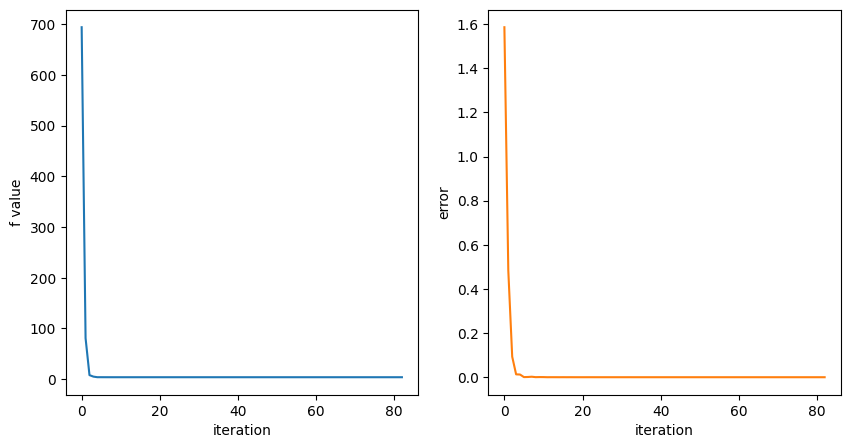

In [43]:

v, hist = grad_descent(x0, partial(f, A, b), partial(gradient_stochastic, A, b), LearningRateDescend(2))
print_result(v, hist)

[ 0.67414247 -0.17906438] 4.052251863620198


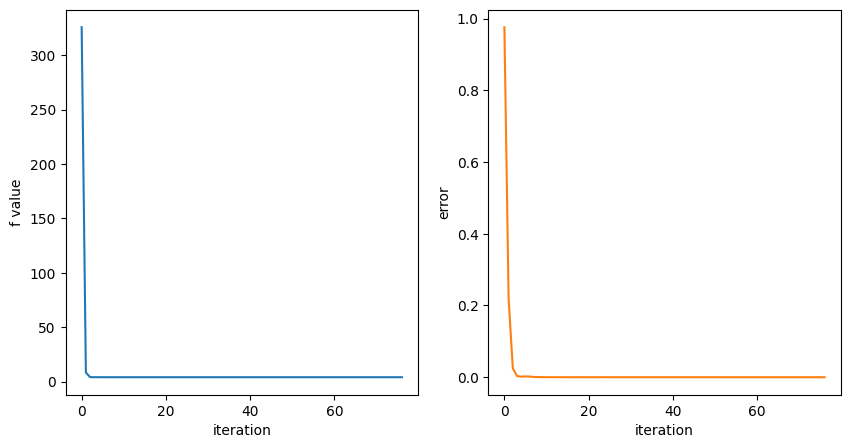

In [44]:
v, hist = grad_descent(x0, partial(f, A, b), partial(gradient_stochastic, A, b), LearningRateDescend(k0=10))
print_result(v, hist)

[ 0.69096423 -0.18371909] 4.257485478448899


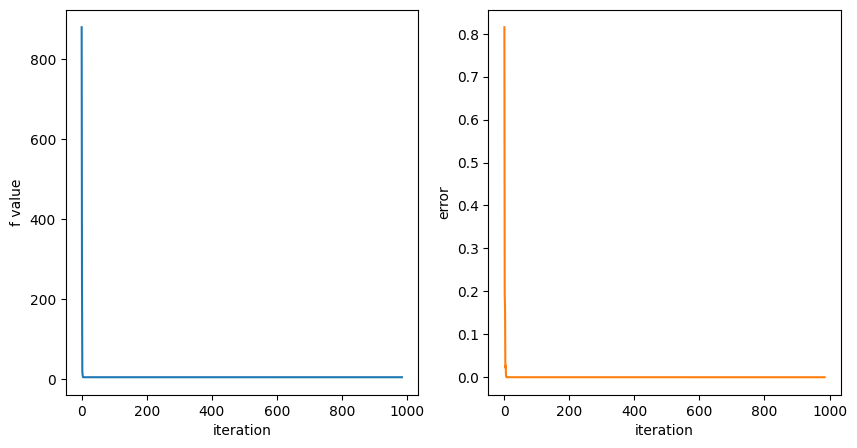

In [45]:
v, hist = grad_descent(x0, partial(f, A, b), partial(gradient_stochastic, A, b), LearningRateDescend(), max_iter=1000)
print_result(v, hist)

[-0.02926993  0.08869001] 0.21557805515641995


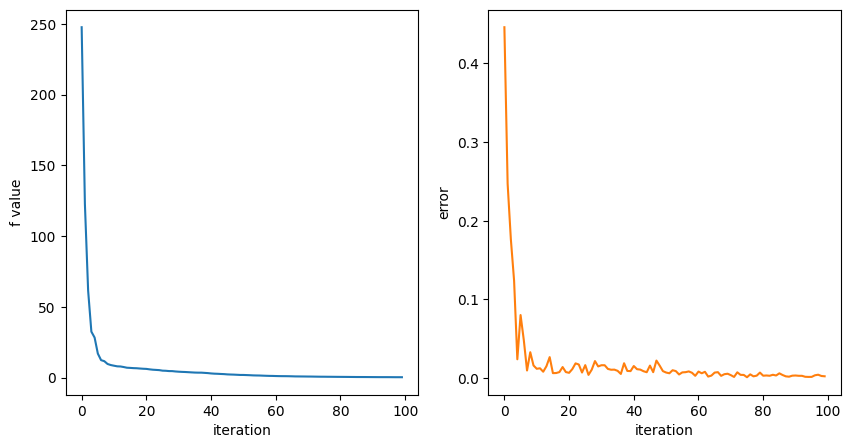

In [48]:
df = pd.read_csv('./datos_cuadraticos.csv')

A = df[['x', 'y']].to_numpy()
x0 = np.array([1, 1])
b = np.zeros(len(df))

v, hist = grad_descent(x0, partial(f, A, b), partial(gradient_stochastic, A, b), LearningRateFixed())
print_result(v, hist)

---

In [74]:
import random
import math

def randomized_median(S):
    n = len(S)
    k = n**(3.0/4.0)
    k_ceil = int(math.ceil(k)) 
    k_floor = int(math.floor(k)) 
    n_sqrt = int(math.sqrt(n))
  
    R = random.sample(list(S), k_ceil)
    R.sort()

    d = R[int(0.5*k_floor - n_sqrt) - 1]
    u = R[int(0.5*k_ceil + n_sqrt) - 1]
    C = [x for x in S if d <= x <= u]

    l_d = len([x for x in S if x < d])
    l_u = len([x for x in S if x > u])

    if l_d > n/2 or l_u > n/2:
        return None
    elif 0 < len(C) <= 4*k:
        C.sort()
        try:
            return C[int(math.floor(n/2) - l_d)]
        except:
            return C[- 1]
    else:
        return None

In [75]:
import statistics
from tqdm.notebook import trange

N = 1000
data = np.zeros((N, 100))
for n in trange(5, N):
    for i in range(100):
        arr = np.random.randint(0, n, size=n)
        data[n, i] = randomized_median(arr) != statistics.median(arr)


  0%|          | 0/995 [00:00<?, ?it/s]

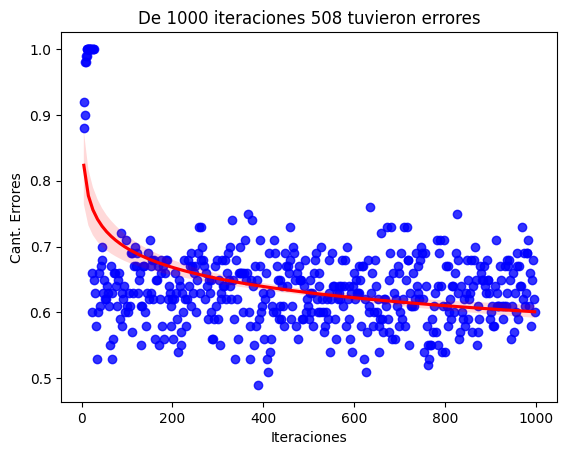

In [84]:
array = [(i, x) for i, x in enumerate([sum(row)/100 for row in data]) if x != 0]


ax = sns.regplot(
    x=list(map(lambda x:x[0], array)), 
    y= list(map(lambda x:x[1], array)),
    logx=True, 
    scatter_kws={"color": "blue"}, 
    line_kws={"color": "red"}
)

ax.set_xlabel("Iteraciones")
ax.set_ylabel("Cant. Errores")
ax.set_title("De {} iteraciones {} tuvieron errores".format(
    N, len(array),
))

plt.show()

Tras hacer varias pruebas no se alcanzo el resultado explicado en clases, el error promedio se mantiene entre 0.5-0.8. Lo más cercano a lo expresado en clase es que para dimensiones muy pequeñas hay mayor cantidad de errores 